<h1>Data Source Documentation></h1>
1. Kaggle CV data <br>
2. Open Image Dataset v6 (OIDv6): extracted using https://github.com/DmitryRyumin/OIDv6 <br>
3. False examples for the model to learn: https://diode-dataset.org/ <br>
4. Image augments, we generated 1 augment for each image <br>
5. All labels generated using https://github.com/tzutalin/labelImg <br>
6. Model of choice: YOLOv4 https://github.com/AlexeyAB/darknet <br>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

base_folder = '/home/ubuntu/data'
data_folder = base_folder
train_imgs_folder = os.path.join( data_folder, 'train', 'train' )
train_annotations = os.path.join( data_folder, 'train.json' )
val_imgs_folder = os.path.join( data_folder, 'val', 'val' )
val_annotations = os.path.join( data_folder, 'val.json' )

train_pickle = os.path.join( data_folder, 'train.p/train.p' )
val_pickle = os.path.join( data_folder, 'val.p/val.p' )

save_model_folder = os.path.join( base_folder, 'saved_models' )
load_model_folder = save_model_folder

In [ ]:
# define helper functions
def imShow(path):
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
%cd ~/darknet

/home/ubuntu/darknet


<h1>Training Step<h1>

In [ ]:
!./darknet detector train "/home/ubuntu/darknet/build/darknet/x64/data/obj.data" "/home/ubuntu/darknet/cfg/yolo-obj.cfg" "/home/ubuntu/yolo_weights/yolo-obj_w1.weights" -map -dont_show

<h1>Visualise predictions<h1>

In [ ]:
!./darknet detector test "build/darknet/x64/data/obj.data" "cfg/yolo-obj.cfg" "../yolo_weights/yolo-obj_best.weights" '/home/ubuntu/darknet/build/darknet/x64/data/interim/17197.jpg'

 CUDA-version: 10000 (10020), cuDNN: 7.5.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 520, cudnn_half = 0, GPU: Tesla M60 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304

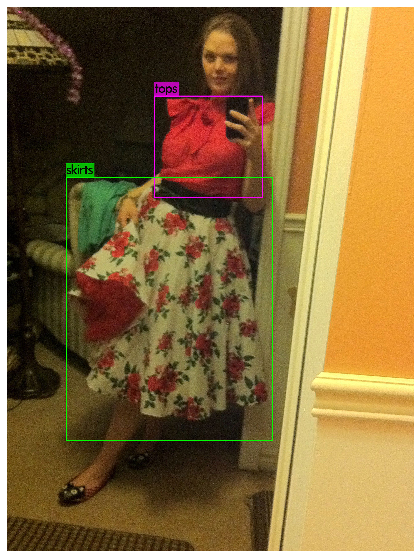

In [ ]:
imShow('predictions.jpg')

<h1>Generating Predictions<h1>

In [ ]:
!./darknet detector test "build/darknet/x64/data/obj.data" "cfg/yolo-obj.cfg" "../yolo_weights/yolo-obj_best.weights" -ext_output -dont_show -out interim2_result.json < "/home/ubuntu/darknet/build/darknet/x64/data/interim.txt"

 CUDA-version: 10000 (10020), cuDNN: 7.5.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 520, cudnn_half = 0, GPU: Tesla M60 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304

<h1>Format results<h1>

In [ ]:
detections = []
with open("results/results.txt", "r") as f:
    for i, pred in enumerate(f):
        line = pred.strip().split(" ")
        img_id = int(line[0])
        conf = float(line[1])
        xmin = float(line[2])
        ymin = float(line[3])
        w = float(line[4])
        h = float(line[5])
        cat_id = int(line[6])
        detections.append({'image_id':img_id, 'category_id':cat_id, 'bbox':[xmin, ymin, w, h], 'score':conf})

In [ ]:
with open("../test_result_raw.json", "r") as f:
    sub = json.load(f)

In [ ]:
pred = pd.DataFrame(sub)

In [ ]:
l = []
path = "../test"
for i in range(len(sub)):
    imgid = int(sub[i]["filename"].split("/")[-1][:-4])
    im = PIL.Image.open(os.path.join(path, sub[i]["filename"].split("/")[-1]))
    width, height = im.size
    objects = sub[i]["objects"]
    for o in objects:
        cat_id = o["class_id"] + 1
        xmin = round((o["relative_coordinates"]["center_x"] - o["relative_coordinates"]["width"]/2) * width, 6)
        ymin = round((o["relative_coordinates"]["center_y"] - o["relative_coordinates"]["height"]/2) * height, 6)
        w = o["relative_coordinates"]["width"] * width
        h = o["relative_coordinates"]["height"] * height
        score = o["confidence"]
        l.append({"image_id": imgid, "category_id":cat_id, "bbox": [xmin, ymin, w, h], "score": score})
len(l)

In [ ]:
with open('../submission1.json', 'w') as f:
    json.dump(l, f)

<h1>Check predictions<h1>

In [ ]:
with open('../submission1.json', 'r') as f:
    det = json.load(f)

In [ ]:
pred = pd.DataFrame(det)

In [ ]:
pred[pred.category_id==0]

In [ ]:
pred["file_name"] = pred['image_id'].astype(str) + ".jpg"
pred[["xmin", "ymin", "w", "h"]] = pd.DataFrame(pred.bbox.tolist(), index=pred.index)
pred = pred.drop(columns=["bbox"])
pred.sample(5)

In [ ]:
data_folder = '/Downloads/YOLO'
path = '../test'

def visualisesub(image, categories, pred):    
#     print(image)
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0, 0, 1, 1])
    # read and plot the image
    pimage = plt.imread(os.path.join(path, image))
    plt.title(image)
    plt.imshow(pimage)
    # iterating over the image for different objects
    for _,row in pred[pred.file_name == image].iterrows():
        xmin = row.xmin
        print("xmin: ", xmin)
        xmax = row.xmin + row.w
        print("xmax: ", xmax)
        ymin = row.ymin
        print("ymin: ", ymin)
        ymax = row.ymin + row.h
        print("ymax: ", ymax)

        width = row.w
        height = row.h

    # assign different color to different classes of objects
        if row.category_id ==  1:
            edgecolor = "red"
            ax.annotate(categories[1], xy=(xmax-40,ymin+20))
        elif row.category_id == 2:
            edgecolor = "blue"
            ax.annotate(categories[2], xy=(xmax-40,ymin+20))
        elif row.category_id == 3:
            edgecolor = "green"
            ax.annotate(categories[3], xy=(xmax-40,ymin+20))
        elif row.category_id == 4:
            edgecolor = "yellow"
            ax.annotate(categories[4], xy=(xmax-40,ymin+20))
        elif row.category_id == 5:    
            edgecolor = "purple"
            ax.annotate(categories[5], xy=(xmax-40,ymin+20))

    # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), 
                             width, height, 
                             edgecolor = edgecolor, 
                             facecolor = 'none')
        ax.add_patch(rect)
    plt.show(block=False)

In [ ]:
cat_list = ['tops', 'trousers', 'outerwear', 'dresses', 'skirts']
categories = {k+1: v for k, v in enumerate(cat_list)}

In [ ]:
visualisesub("63.jpg", categories, pred)